In [11]:
# Standard Imports for Data Analysis and Visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
import warnings

In [2]:
# Set matplotlib inline for notebooks (you can remove if not using Jupyter)
%matplotlib inline

In [3]:
# 1. Load Data
def load_data(train_path, test_path):
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    return train_df, test_df

In [4]:
train_df, test_df = load_data('/kaggle/input/heartdisease/Train Dataset .csv', '/kaggle/input/heartdisease/Test Dataset.csv')

In [5]:
# 2. Data Overview
def data_overview(df):
    print(df.head(5))
    print(df.info())
    print(df.describe())
    
data_overview(train_df)

      Id  Age  Sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  16167   33    0   1       158   205    1        0      154      0      1.5   
1  11275   53    1   2       198   154    0        1      104      0      0.8   
2  13251   37    1   2       101   202    1        0      155      0      2.1   
3  19921   75    0   0       113   306    1        2       88      1      4.9   
4  11293   35    1   2       139   419    1        1      166      1      0.9   

   slope  ca  thal  target  
0      1   4     1       1  
1      2   1     0       0  
2      1   3     1       1  
3      0   2     2       1  
4      2   4     0       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64 

In [6]:
# 3. Data Cleaning: Checking for missing and duplicate values
def check_data_quality(df):
    missing = df.isna().sum()
    duplicates = df.duplicated().sum()
    print(f"Missing values:\n{missing}")
    print(f"Duplicate rows: {duplicates}")
    
check_data_quality(train_df)

Missing values:
Id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Duplicate rows: 0


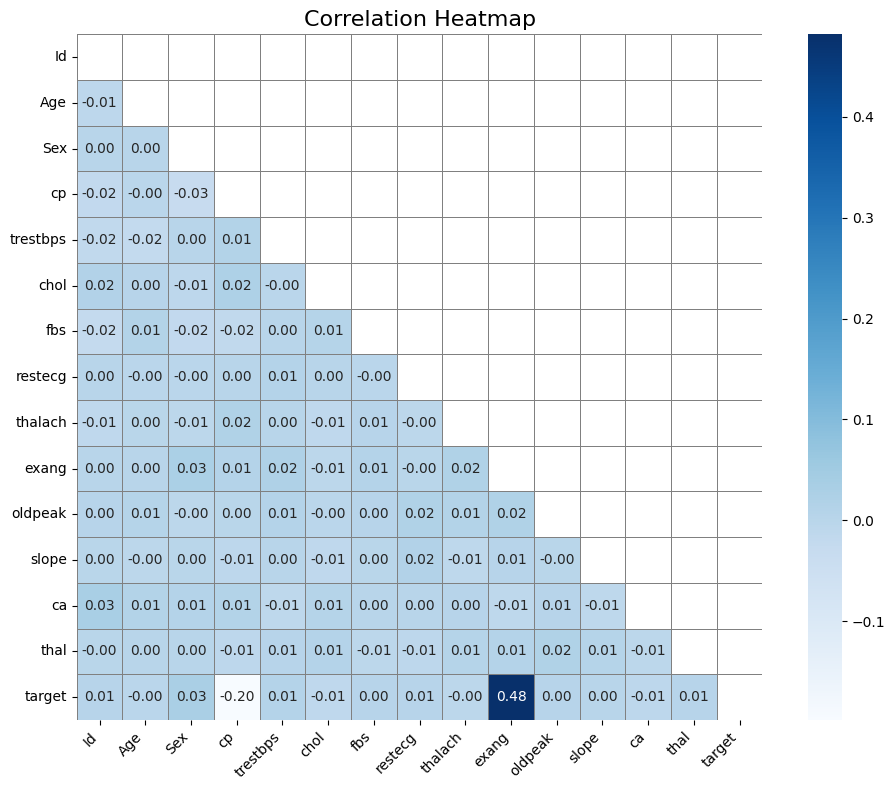

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


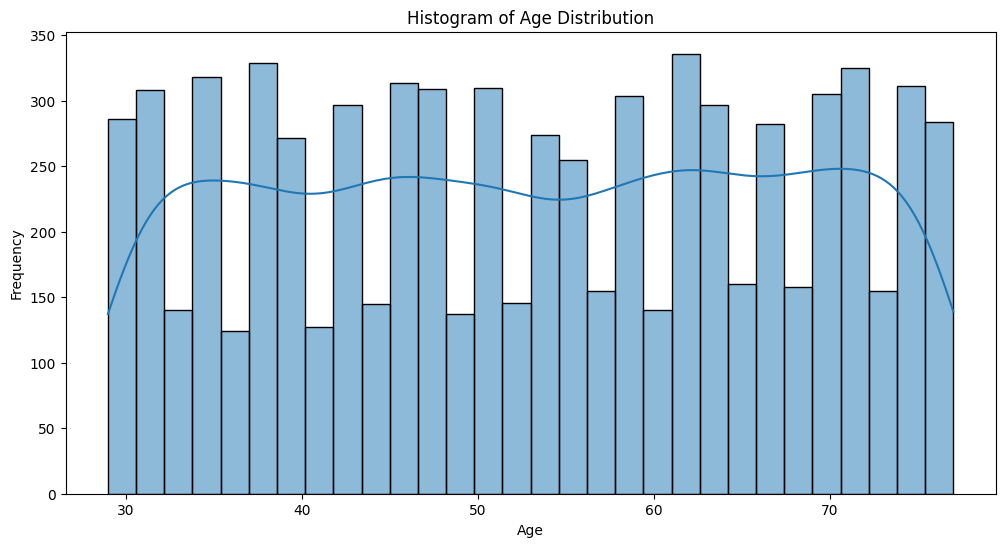

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


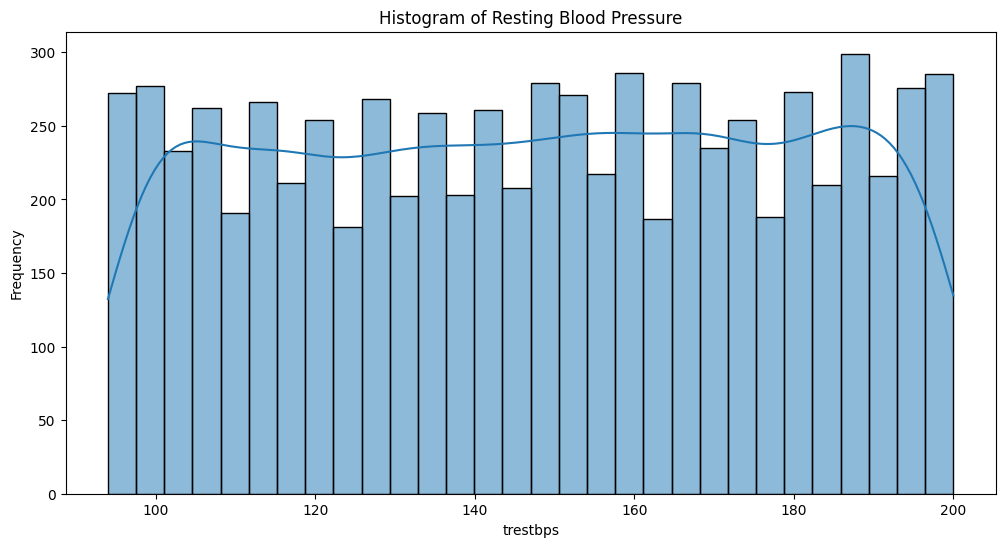

In [12]:
# 4. Exploratory Data Analysis (EDA)
def plot_heatmap(df, title='Correlation Heatmap'):
    """Heatmap for correlation matrix."""
    plt.figure(figsize=(10, 8))  # Smaller size for better readability
    mask = np.triu(np.ones_like(df.corr(), dtype=bool)) 
    
    # Suppress FutureWarnings for a cleaner output
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='Blues', cbar=True, mask=mask,
                    square=True, linewidths=0.5, linecolor='gray') 
    
    plt.title(title, fontsize=16)  # Larger title for better visibility
    plt.xticks(rotation=45, ha='right')  
    plt.yticks(rotation=0)  # Keep y-axis labels horizontal
    plt.tight_layout()  
    plt.show()

def plot_histogram(df, column, title):
    """Plot histogram for a specified column."""
    plt.figure(figsize=(12, 6))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plotting
plot_heatmap(train_df)
plot_histogram(train_df, 'Age', 'Histogram of Age Distribution')
plot_histogram(train_df, 'trestbps', 'Histogram of Resting Blood Pressure')

In [13]:
# 5. Feature and Target Selection
X = train_df.drop(columns=['target'])
y = train_df['target']

In [14]:
# 6. Split Data
def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

In [15]:
X_train, X_val, y_train, y_val = split_data(X, y)

In [16]:
# 7. Random Forest Model Training and Evaluation
def train_rf_model(X_train, y_train, X_val, y_val):
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_val = rf_model.predict(X_val)
    
    print("RandomForest Validation Accuracy:", accuracy_score(y_val, y_pred_val))
    print(classification_report(y_val, y_pred_val))
    
    return rf_model


In [17]:
rf_model = train_rf_model(X_train, y_train, X_val, y_val)

RandomForest Validation Accuracy: 0.8275154004106776
              precision    recall  f1-score   support

           0       0.52      0.42      0.46       260
           1       0.88      0.92      0.90      1201

    accuracy                           0.83      1461
   macro avg       0.70      0.67      0.68      1461
weighted avg       0.82      0.83      0.82      1461



In [18]:
# 8. Cross-Validation for Random Forest
def cross_validate_model(model, X, y, cv=5):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Average Cross-Validation Accuracy: {cv_scores.mean()}")

cross_validate_model(rf_model, X, y)

Cross-Validation Scores: [0.81451061 0.81040383 0.816564   0.81232877 0.80616438]
Average Cross-Validation Accuracy: 0.8119943180219966


In [19]:
# 9. Hyperparameter Tuning for Random Forest using RandomizedSearchCV
def tune_rf_model(X_train, y_train):
    param_grid_rf = {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [10, 20, 30, 40, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt'],
        'bootstrap': [True, False]
    }
    
    random_search_rf = RandomizedSearchCV(
        estimator=RandomForestClassifier(random_state=42), 
        param_distributions=param_grid_rf,
        n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1
    )
    random_search_rf.fit(X_train, y_train)
    
    return random_search_rf.best_estimator_

In [20]:
best_rf = tune_rf_model(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   4.6s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   5.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   5.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimat

In [21]:
# 10. Recursive Feature Elimination (RFE)
def perform_rfe(model, X_train, y_train, n_features=8):
    rfe_selector = RFE(estimator=model, n_features_to_select=n_features)
    rfe_selector.fit(X_train, y_train)
    return rfe_selector

rfe_selector = perform_rfe(best_rf, X_train, y_train)

In [22]:
# 11. Retrain with Selected Features
def retrain_model_with_rfe(model, X_train, X_val, y_train, y_val, rfe_selector):
    X_train_rfe = X_train.iloc[:, rfe_selector.support_]
    X_val_rfe = X_val.iloc[:, rfe_selector.support_]
    
    model.fit(X_train_rfe, y_train)
    y_pred_rfe = model.predict(X_val_rfe)
    
    print(f"RFE Feature Selection Accuracy: {accuracy_score(y_val, y_pred_rfe)}")

In [23]:
retrain_model_with_rfe(best_rf, X_train, X_val, y_train, y_val, rfe_selector)

RFE Feature Selection Accuracy: 0.8186173853524983


In [24]:
# 12. Train XGBoost Model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_val = xgb_model.predict(X_val)
print("XGBoost Validation Accuracy:", accuracy_score(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))

XGBoost Validation Accuracy: 0.8261464750171116
              precision    recall  f1-score   support

           0       0.51      0.53      0.52       260
           1       0.90      0.89      0.89      1201

    accuracy                           0.83      1461
   macro avg       0.70      0.71      0.71      1461
weighted avg       0.83      0.83      0.83      1461



In [25]:
# 13. Hyperparameter Tuning for XGBoost using RandomizedSearchCV
def tune_xgb_model(X_train, y_train):
    param_grid = {
        'n_estimators': [100, 300, 500, 1000],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7, 10],
        'subsample': [0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [1, 3, 5, 7],
        'gamma': [0, 0.1, 0.3, 0.5]
    }

    random_search = RandomizedSearchCV(
        estimator=XGBClassifier(random_state=42),
        param_distributions=param_grid,
        scoring='accuracy', cv=5, n_iter=50, verbose=1, random_state=42, n_jobs=-1
    )
    
    random_search.fit(X_train, y_train)
    
    return random_search.best_estimator_

In [26]:
xgb_new = tune_xgb_model(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [27]:
# 14. Stacking Model with Random Forest and XGBoost
def train_stacking_model(X_train, y_train, X_val, y_val, rf_model, xgb_model):
    stacking_model = StackingClassifier(
        estimators=[('rf', rf_model), ('xgb', xgb_model)],
        final_estimator=XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1),
        passthrough=False
    )
    
    stacking_model.fit(X_train, y_train)
    
    y_pred_stack = stacking_model.predict(X_val)
    print(f"Stacking Model Accuracy: {accuracy_score(y_val, y_pred_stack)}")
    
    return stacking_model

In [28]:
stacking_model = train_stacking_model(X_train, y_train, X_val, y_val, best_rf, xgb_new)

Stacking Model Accuracy: 0.8329911019849419


In [29]:
# 15. Final Submission
def create_submission(model, test_df, output_file):
    test_df = test_df.rename(columns={'age': 'Age', 'sex': 'Sex', 'id': 'Id'})
    test_predictions = model.predict(test_df)
    
    submission = pd.DataFrame({'id': test_df['Id'], 'target': test_predictions})
    submission.to_csv(output_file, index=False)

create_submission(stacking_model, test_df, 'submission_last.csv')

[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   3.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.5s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   5.6s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.2s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   5.7s
[CV] END bootstrap=True, max_de